In [3]:
import numpy as np
import pandas as pd
import pydicom
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load and Preprocess DICOM Images
def load_dicom_images(image_paths, img_size=(128, 128)):
    images = []
    for path in image_paths:
        dicom = pydicom.dcmread(path)
        img = dicom.pixel_array
        img_resized = tf.image.resize(img, img_size).numpy()  # Resize the image
        images.append(img_resized)
    return np.array(images)

In [4]:
# Step 2: Preprocess the Labels (Normal/Mild = 1, Moderate = 2, Severe = 4)
def preprocess_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)  # Convert severity to 0, 1, 2
    return to_categorical(encoded_labels, num_classes=3)  # Convert to one-hot vectors

In [5]:
# Step 3: Build the CNN Model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 3 classes for Normal/Mild, Moderate, Severe
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Step 4: Load Data (Example)
# Assuming you have a CSV file mapping image paths to labels (severity scores)
data = pd.read_csv(r"C:\Users\HP\Desktop\ExpRSNA\exptrain.csv")  # Replace with your dataset path


In [7]:
data.head(5)

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [8]:
# two extra columns added to current image data like image path and severity path to give parameters in function.
import os
import pandas as pd

# Step 1: Define the directory containing your DICOM images
dicom_directory = r'C:/Users/HP/Desktop/ExpRSNA/142859125/'  # Replace with the actual path to your images

# Step 2: Create a list of image filenames (paths)
image_files = [f for f in os.listdir(dicom_directory) if f.endswith('.dcm')]  # List all DICOM (.dcm) files

# Step 3: Manually define severity scores for each image (you'll need to adjust this according to your data)
# For example, here I'm assuming a simple mapping, but you'll need to modify this based on your actual data
severity_scores = [1, 2, 4] * (len(image_files) // 3)  # Example: Repeating some scores, change as needed

# Step 4: Ensure the length of severity_scores matches the number of images
if len(image_files) != len(severity_scores):
    raise ValueError("The number of severity scores must match the number of image files.")

# Step 5: Create a DataFrame to hold image paths and corresponding severity scores
data = pd.DataFrame({
    'image_path': [os.path.join(dicom_directory, f) for f in image_files],  # Full path to each DICOM image
    'severity_score': severity_scores  # Severity scores for each image
})

# Step 6: Save the DataFrame to a CSV file
output_csv = r'C:/Users/HP/Desktop/ExpRSNA/image_data.csv'  # Specify where you want to save the CSV file
data.to_csv(output_csv, index=False)

print(f"CSV file created at: {output_csv}")


CSV file created at: C:/Users/HP/Desktop/ExpRSNA/image_data.csv


In [9]:
image_paths = data['image_path'].values  # Replace 'image_path' with the actual column name in your CSV file
severity_scores = data['severity_score'].values  # Replace 'severity_score' with the actual column name in your CSV file

In [10]:
import numpy as np
import pydicom
import tensorflow as tf

# Function to load and preprocess DICOM images
def load_dicom_images(image_paths, img_size=(128, 128)):
    images = []
    for path in image_paths:
        # Read the DICOM file
        dicom = pydicom.dcmread(path)
        
        # Get the image pixel array from the DICOM file
        img = dicom.pixel_array
        
        # Ensure the image is in 2D format (grayscale), if not convert it
        if len(img.shape) == 2:
            img = np.expand_dims(img, axis=-1)  # Add a channel dimension for grayscale
        
        # Resize the image to the target size
        img_resized = tf.image.resize(img, img_size).numpy()
        
        # Normalize pixel values between 0 and 1
        img_resized = img_resized / 255.0
        
        # Append the preprocessed image to the list
        images.append(img_resized)
    
    # Convert the list of images to a numpy array (4D array: batch_size, height, width, channels)
    return np.array(images)

# Usage:
X = load_dicom_images(image_paths)  # Now X will be a 4D array of shape (batch_size, height, width, channels)


In [11]:
X.shape

(36, 128, 128, 1)

In [12]:
y = preprocess_labels(severity_scores)  # Preprocess labels

In [13]:
y.shape

(36, 3)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Step 5: Model Training
input_shape = (128, 128, 1)  # Assuming grayscale DICOM images
model = build_cnn_model(input_shape)

C:\Users\HP\anaconda3\anacondanavigator\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Use data augmentation to avoid overfitting
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)

In [17]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\HP\anaconda3\anacondanavigator\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3214 - loss: 1.0949 - val_accuracy: 0.2500 - val_loss: 1.1260
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.3214 - loss: 1.1863 - val_accuracy: 0.2500 - val_loss: 1.1969
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.4286 - loss: 1.1489 - val_accuracy: 0.2500 - val_loss: 1.1471
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.4286 - loss: 1.1141 - val_accuracy: 0.2500 - val_loss: 1.1103
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.2500 - loss: 1.1210 - val_accuracy: 0.3750 - val_loss: 1.0998
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.3571 - loss: 1.0976 - val_accuracy: 0.3750 - val_loss: 1.0967
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.4643 - loss: 1.1015 - val_accuracy: 0.3750 - val_loss: 1.0972
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.5000 - loss: 1.0870 - val_accuracy: 0.2500 - val_loss: 1.0994
Epoch 

In [18]:
# Step 6: Predictions and Output Probabilities
# Let's say test_data is the test set of images (X_test)
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [ ]:
# Step 7: Create Submission File
test_ids = data['row_id'].values  # Assuming you have row IDs for the test set
output = []
for i, pred in enumerate(predictions):
    row_id = test_ids[i]
    normal_mild_prob = pred[0]
    moderate_prob = pred[1]
    severe_prob = pred[2]
    output.append([row_id, normal_mild_prob, moderate_prob, severe_prob])

In [26]:
# Define conditions and disc levels
conditions = [
    'left_neural_foraminal_narrowing',
    'right_neural_foraminal_narrowing',
    'left_subarticular_stenosis',
    'right_subarticular_stenosis',
    'spinal_canal_stenosis'
]

disc_levels = ['l1_l2', 'l2_l3', 'l3_l4', 'l4_l5', 'l5_s1']

# Let's assume we have predictions for all these conditions across the 5 disc levels
output = []

# Assuming 'predictions' is the array containing the model's predicted probabilities
# Iterate over the predictions and generate row IDs dynamically
for i, pred in enumerate(predictions):
    # Example: Generate a row_id for each condition and disc level
    for condition in conditions:
        for level in disc_levels:
            row_id = f"{i+1}_{condition}_{level}"  # Generate the row ID dynamically (e.g., '1_left_neural_foraminal_narrowing_l1_l2')
            
            # Extract the probabilities for each severity level from the prediction
            normal_mild_prob = pred[0]
            moderate_prob = pred[1]
            severe_prob = pred[2]
            
            # Append the row ID and the probabilities to the output list
            output.append([row_id, normal_mild_prob, moderate_prob, severe_prob])

# Convert the result to a DataFrame
output_df = pd.DataFrame(output, columns=["row_id", "normal_mild", "moderate", "severe"])

# Save the output to a CSV file

output_df.to_csv('submission.csv', index=False)# automatically it has been saved in C: users\hp(default folder) 


In [36]:
import cv2
import pydicom
import numpy as np

# Read the DICOM file
dicom = pydicom.dcmread(r"C:\Users\HP\Desktop\ExpRSNA\142859125\5.dcm")
IMG_SIZE = 128  # Target size for the image

# Get the image pixel array from the DICOM file
img = dicom.pixel_array

# Ensure the image is in 2D format (grayscale), if not convert it
if len(img.shape) == 2:
    # Resize the image to the target size (255x255)
    image_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    
    # Normalize the pixel values and expand dimensions to add a channel axis (for grayscale)
    image_array = np.expand_dims(image_resized, axis=0) / 255.0

# Print the resized image shape and the normalized image array
print("Resized image shape:", image_array.shape)
        


Resized image shape: (1, 128, 128)


Input shape for model: (1, 128, 128, 1)


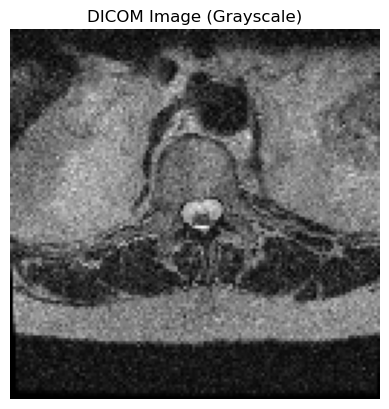

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: [[2.5961159e-03 4.7665606e-15 9.9740392e-01]]


In [46]:
import matplotlib.pyplot as plt
# Expand dimensions to match the expected input shape: (batch_size, height, width, channels)
image_array = np.expand_dims(image_resized, axis=0)  # Add batch dimension
image_array = np.expand_dims(image_array, axis=-1)   # Add channel dimension (1 for grayscale)

# Now the shape should be (1, IMG_SIZE, IMG_SIZE, 1) for a grayscale image
print("Input shape for model:", image_array.shape)

# Run the prediction
# Display the image
plt.imshow(np.squeeze(image_array), cmap='grey')
plt.axis('off')
plt.title('DICOM Image (Grayscale)')
plt.show()
prediction = model.predict(image_array)
print("Prediction:", prediction)

This suggests that the model has three output classes, and the output is a probability distribution over these classes. Here's how to interpret it:

Breakdown of the Output:
The output is an array of probabilities for each class, where each value corresponds to the probability that the input image belongs to a specific class.

2.5961159e-03 → This is the predicted probability for class 1 (likely around 0.0026 or 0.26%).
4.7665606e-15 → This is the predicted probability for class 2 (essentially 0, close to 4.77e-15).
9.9740392e-01 → This is the predicted probability for class 3 (around 0.9974 or 99.74%).
Interpretation:
The sum of these probabilities should be very close to 1.0, indicating that the model is confident that the input belongs to one of the three classes.
The highest probability is for the third class (9.9740392e-01), meaning the model is about 99.74% confident that the input image belongs to class 3.
In summary:
Your model is predicting that the input image most likely belongs to class 3, with a high confidence of about 99.74%.
The other classes have very low probabilities, with class 1 having around 0.26% confidence, and class 2 having an almost zero probability.
If you have specific labels for these classes, you can map the highest probability back to its corresponding class label. For instance, if:

Class 1 represents "Normal",
Class 2 represents "Benign",
Class 3 represents "Malignant",
Then the model is predicting that the image is Malignant with a confidence of 99.74%.